# IRIS 데이터

In [1]:
import pandas as pd

In [2]:
iris = pd.read_csv('./IRIS.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# 타겟 변수의 구성 확인

iris['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [4]:
# id생성

iris['id'] = range(len(iris))

In [5]:
# 열 순서 변경

iris = iris[['id', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']]
iris

,id,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,2,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,Iris-virginica
146,146,6.3,2.5,5.0,1.9,Iris-virginica
147,147,6.5,3.0,5.2,2.0,Iris-virginica
148,148,6.2,3.4,5.4,2.3,Iris-virginica


# KNN실습(분류)

## 특징

- 데이터가 많으면 느리다

## 파라미터

- n_neighbors: 가장 가까운 몇 개를 볼 건지

## k(참조할 이웃의 수)의 결정

- 만일 k가 매우 작으면 노이즈에 민감한 과적합의 우려가 있음
- 만일 k가 매우 크면 지역적 구조를 팡가할 수 있는 능력을 잃게 됨
- 적절한 k를 찾아내는 것이 우수한 k인접이웃모델을 만드는데 필수
- 검증 데이터에 대한 에러가 가장 낮은 k값을 선택

## 프로세스

1. 학습 데이터를 이용해 각 k별로 KNN모델을 학습시킴
2. 만들어진 모델을 이용해 검증 데이터에서 예측
3. 검증 데이터에서 실제 값과 예측치의 에러율을 확인
4. 에러율이 가장 작은 k가 최적의 k

### KNN 학습시키기

In [6]:
# iris 데이터에서 100개를 랜덤추출하여 train 데이터로 지정

train = iris.sample(100, replace = False, random_state = 2022).reset_index().drop(['index'], axis = 1)

In [7]:
# 추출되지 않은 나머지를 test데이터로 지정

test = iris.loc[~iris['id'].isin(train['id'])].reset_index().drop(['index'], axis = 1)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
knn = KNeighborsClassifier(n_neighbors = 2)

In [10]:
# knn모델을 train 데이터에서 학습시킴

knn.fit(train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], train['species'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [11]:
# 예측

predictions = knn.predict(test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

In [12]:
test['pred'] = predictions
test.head()

,id,sepal_length,sepal_width,petal_length,petal_width,species,pred
0,11,4.8,3.4,1.6,0.2,Iris-setosa,Iris-setosa
1,12,4.8,3.0,1.4,0.1,Iris-setosa,Iris-setosa
2,13,4.3,3.0,1.1,0.1,Iris-setosa,Iris-setosa
3,14,5.8,4.0,1.2,0.2,Iris-setosa,Iris-setosa
4,15,5.7,4.4,1.5,0.4,Iris-setosa,Iris-setosa


In [13]:
# 정확도 확인

(test['species'] == test['pred']).mean()

0.92

- 실제값과 예측값이 92%정도 일치함

### 최적의 k값 찾기

In [14]:
for k in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], train['species'])
    predictions = knn.predict(test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
    test['pred'] = predictions
    print((test['species'] == test['pred']).mean())

0.94
0.92
0.94
0.94
0.94
0.94
0.94
0.94
0.94
0.96
0.96
0.96
0.94
0.94
0.94
0.96
0.94
0.96
0.94
0.96
0.94
0.9
0.92
0.88
0.86
0.88
0.9
0.88
0.9


- k = 10일때 0.96으로 가장 높으므로 최적의 k는 10

### cross validation

- 모델 성능 측정하기
- 데이터를 n등분 한 뒤(n이 3이라고 가정하면)
- 1번을 test 데이터, 2번과 3번을 train데이터로 두어 1번 데이터에서의 정확도를 계산한다.
- 2번을 test 데이터, 1번과 3번을 train데이터로 두어 2번 데이터에서의 정확도를 계산한다.
- 3번을 test 데이터, 1번과 2번을 train데이터로 두어 3번 데이터에서의 정확도를 계산한다.
- 계산된 3개의 정확도를 평균낸다.

#### 의의

- 3번 정확도를 계산해 평균 낸 것이므로, 1번 정확도를 계산하는 것보다 신뢰성이 높다
- 위와 같은 방법을 3th fold cross validation이라고 함
- n을 몇 번으로 할 지는 자유
- n(cv)가 클수록 정확도는 올라가지만 너무 크면 시간이 오래 걸리므로 적절한 n을 설정해야 함

In [15]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [16]:
# cross validation을 통해 최적의 k를 찾음

for k in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']],
                            iris['species'], cv = 5)
    print(np.mean(scores))

0.96
0.9466666666666665
0.9666666666666668
0.9733333333333334
0.9733333333333334
0.9800000000000001
0.9800000000000001
0.9666666666666668
0.9733333333333334
0.9800000000000001
0.9800000000000001
0.9800000000000001
0.9733333333333334
0.9666666666666666
0.9666666666666668
0.9666666666666668
0.9666666666666668
0.9666666666666666
0.9666666666666668
0.96
0.9666666666666668
0.96
0.96
0.9466666666666667
0.96
0.9466666666666665
0.9466666666666667
0.9399999999999998
0.9333333333333332


- 5th fold cross validation을 사용하면 최적의 k는 6이다

### knn 실습(회귀)

In [17]:
# 회귀를 위해 불필요한 컬럼 제거

del train['species']
del test['species']

In [18]:
# 모델 정의

from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors = 2)

In [19]:
# knn 모델 학습

knn.fit(train[['sepal_length', 'sepal_width', 'petal_length']], train['petal_width'])

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [20]:
# 예측

test['pred'] = knn.predict(test[['sepal_length', 'sepal_width', 'petal_length']])

In [21]:
test.head()

,id,sepal_length,sepal_width,petal_length,petal_width,pred
0,11,4.8,3.4,1.6,0.2,0.30
1,12,4.8,3.0,1.4,0.1,0.15
2,13,4.3,3.0,1.1,0.1,0.20
3,14,5.8,4.0,1.2,0.2,0.20
4,15,5.7,4.4,1.5,0.4,0.25


#### MAE: 회귀문제에서 모델의 성능을 평가하는 방법

In [22]:
abs(test['petal_width'] - test['pred']).mean()

0.15199999999999997

- MAE가 작을수록 좋음

#### 최적의 k 찾기

In [23]:
for k in range(1, 30):
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(train[['sepal_length', 'sepal_width', 'petal_length']], train['petal_width'])
    test['pred'] = knn.predict(test[['sepal_length', 'sepal_width', 'petal_length']])
    print(abs(test['petal_width'] - test['pred']).mean())

0.176
0.15199999999999997
0.1493333333333333
0.15399999999999994
0.15600000000000003
0.155
0.15400000000000003
0.15474999999999997
0.1537777777777778
0.15579999999999997
0.15218181818181817
0.15333333333333335
0.1541538461538462
0.15057142857142858
0.15160000000000004
0.15450000000000003
0.15411764705882355
0.1571111111111111
0.1584210526315789
0.157
0.1575238095238095
0.16054545454545452
0.1613913043478261
0.15991666666666668
0.16159999999999997
0.1642307692307692
0.16659259259259254
0.16535714285714284
0.1664137931034482


- 최적의 k는 3

# 다시 데이터 불러오기

In [24]:
import pandas as pd

In [25]:
iris = pd.read_csv('./IRIS.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [26]:
# 아이디 생성

iris['id'] = range(len(iris))

In [27]:
# 열 순서 변경

iris = iris[['id', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']]
iris.head()

,id,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,2,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
# iris 데이터 중 100개를 랜덤으로 추출해 train 데이터로 지정

train = iris.sample(100, replace = False, random_state = 2022).reset_index().drop(['index'], axis = 1)

In [29]:
# 나머지를 test 데이터로 지정

test = iris.loc[~iris['id'].isin(train['id'])].reset_index().drop(['index'], axis = 1)

# 의사결정나무

## 특징

- 해석이 쉽다
- 빠르다

## 파라미터

- min_samples_split : 의사결정나무에서 최종 노드의 최소 샘플 수

#### 의사결정나무 학습시키기

In [30]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(min_samples_split = 10)

In [31]:
# 의사결정나무 모델을 train 데이터에서 학습시킴

dt.fit(train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], train['species'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [32]:
# 예측

test['pred'] = dt.predict(test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

In [33]:
# 정확도

(test['pred'] == test['species']).mean()

0.88

## 의사결정나무가 만든 규칙을 시각화하고 해석

In [34]:
# 그림의 기본 크기 설정

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 10

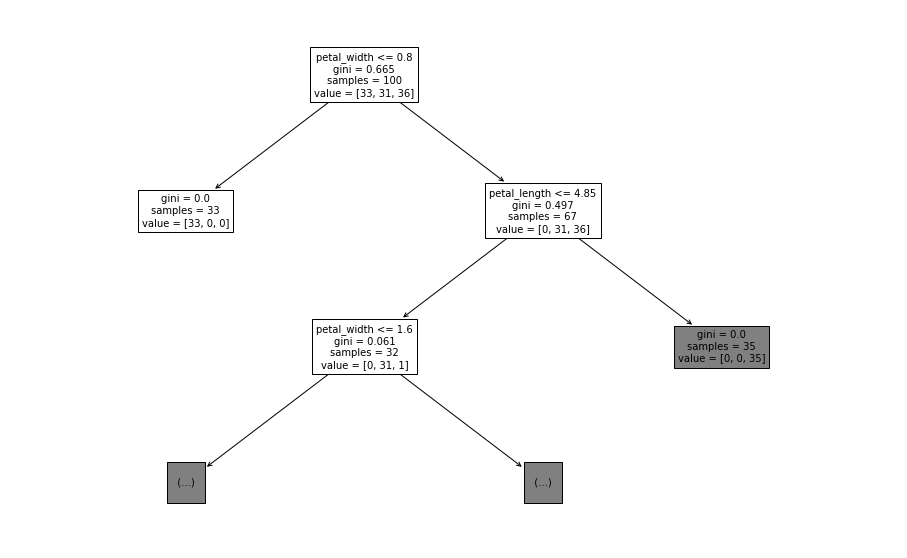

In [38]:
# 의사결정나무 시각화

from sklearn import tree
import matplotlib.pyplot as plt

a = tree.plot_tree(dt, feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
                  max_depth = 2, fontsize = 10)
plt.show(a)

#### cross validation

In [39]:
from sklearn.model_selection import cross_val_score
import numpy as np

dt = DecisionTreeClassifier(min_samples_split = 10)

In [40]:
scores = cross_val_score(dt, iris[['sepal_length', 'sepal_width', 
                                   'petal_length', 'petal_width']], iris['species'], cv = 5)
np.mean(scores)

0.9666666666666668

- 5th fold cross validation으로 진행한 결과 0.97정도의 정확도가 나옴